In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as lin
import itertools

In [2]:
## Function for the dynamical system, competitive LV
def LV_dynamics(A_communityMatrix, fixed_point, x0_IC, epsilon_fpThresh, delta_timeStep, endtime): # no end time necessary
    numSteps = round(endtime/delta_timeStep)
    T_time = np.linspace(1,endtime,numSteps)
    x_point = np.matrix(np.zeros((len(x0_IC),numSteps)))
    
    fp = epsilon_fpThresh
    dt = delta_timeStep
    ET = endtime
    
    A = A_communityMatrix
    p = np.matrix(fixed_point)
    x0 = np.matrix(x0_IC)
    r = A*p
    x_point[:,0] = x0.T
    
    for n in range(1,numSteps):
        dx = np.multiply(dt*x_point[:,n-1],(r - A*x_point[:,n-1]))
        if np.sqrt((dx.T * dx)[0,0]) < fp: #Assuming we've hit the fixed point
            break
        x_point[:,n] = x_point[:,n-1] + dx
        
    x_point = x_point[:,0:n-1]
    #T_time = T_time[:,1:n-1]
    return x_point

In [3]:
## Reaction with two systems boardering at x=0
def LV_reaction(u,x):
    A = np.array([[ 0.14 ,  0.021,  0.164, -0.012,  0.321,  0.639],
        [ 0.021,  0.18 , -0.137,  0.017, -0.256,  0.497],
        [ 0.164, -0.137,  1.649, -0.578, -0.268,  1.4  ],
        [-0.012,  0.017, -0.578,  0.404, -0.181, -0.277],
        [ 0.321, -0.256, -0.268, -0.181,  0.535,  0.071],
        [ 0.639,  0.497,  1.4  , -0.277,  0.071,  0.68 ]])
    p = np.array([1,1,1,1,1,1])
    r = A@ p
    if x >= 0:
        u0 = np.array([8.124,1.34,0.656,.001,.001,.001])
    if x < 0:
        u0 = np.array([.001,.001,.001,2.315,0.492,5.318])
    
    return u@(r - A@ u)


In [4]:
dt = .09**2
time = 100
dx = .1
space = 20 #(-10,10)
eps = .5
rho = dt/(dx**2)
A1 = np.array([[ 0.896,  0.251, -0.103,  0.563, -0.046,  0.325],
       [ 0.251,  0.848, -0.206,  0.196,  0.06 ,  0.828],
       [-0.103, -0.206,  0.939,  0.105, -0.008,  0.051],
       [ 0.563,  0.196,  0.105,  0.962,  0.375,  0.401],
       [-0.046,  0.06 , -0.008,  0.375,  0.906,  0.186],
       [ 0.325,  0.828,  0.051,  0.401,  0.186,  0.976]])

A2 = np.array([[ 0.845,  0.123,  0.085, -0.145, -0.362, -0.445],
       [ 0.123,  0.954,  0.242,  0.16 ,  0.237, -0.15 ],
       [ 0.085,  0.242,  0.942,  0.551, -0.029, -0.027],
       [-0.145,  0.16 ,  0.551,  0.813,  0.02 ,  0.08 ],
       [-0.362,  0.237, -0.029,  0.02 ,  0.986,  0.105],
       [-0.445, -0.15 , -0.027,  0.08 ,  0.105,  0.972]])

p1 = np.array([1,1,1,1,1,1])
p2 = (1/2.)*np.array([1,1,1,1,1,1])
r1 = A1@ p1
r2 = A2@ p2



space_step = round(space/dx)
K = space_step
time_step = round(time/dt)
T = time_step

U = np.zeros((T,K+1,6))

for k in range(K + 1):
    if k >= K/2 + 1:
        U[0,k,:] = p1
    else:
        U[0,k,:] = p2

for i in range(T-1):
    for k in range(K - 1):
        k = k+1
        if k >= K/2 + 1:
            U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r1-A1@ U[i,k,:]))
        else:
            U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r2-A2@ U[i,k,:]))
    U[i+1,K,:] = U[i+1,K-1,:]
    U[i+1,0,:] = U[i+1,1,:]


This is the first example.  
Two community matrices, two different globally stable fixed points (1,1,1,1,1,1) and .5*(1,1,1,1,1,1).
Here we find our waves are traveling very slowly to the left for species 1, 4, and 6.
As for the other 3 species, it is more difficult to tell due to the effects of the diffusion, but species 2 and 3 can be seen to be traveling right if you only look at later time samples.
As for species 5, it appears to not be traveling until much much later, and then it travels left.

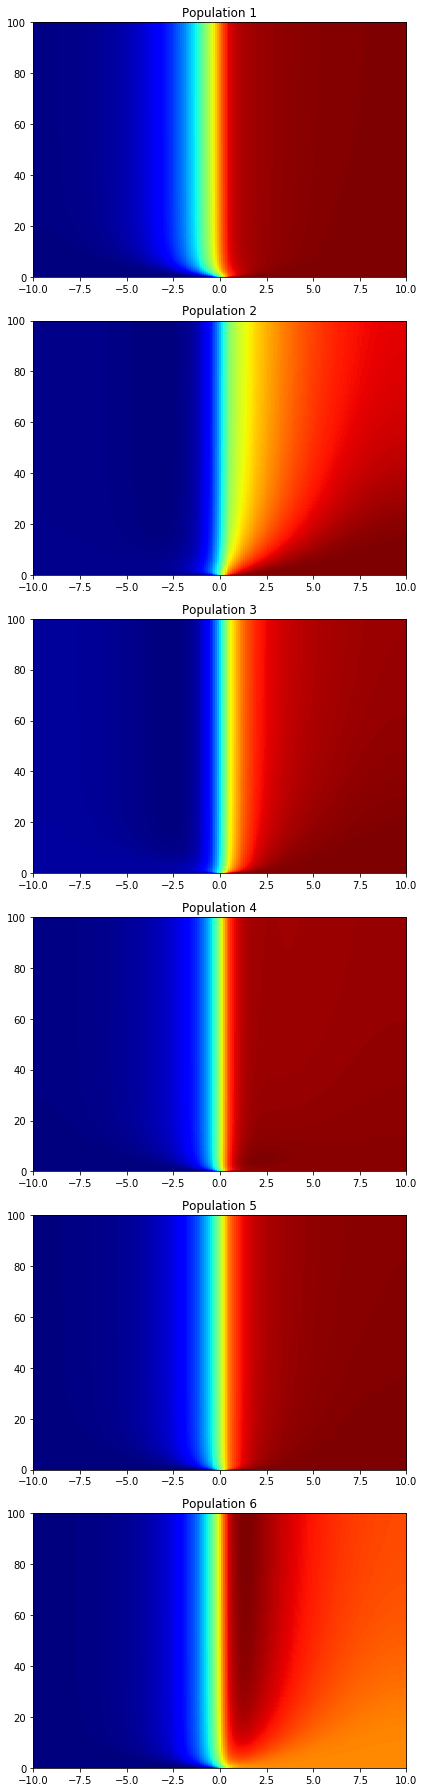

In [5]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(6,25))

ax1.imshow(U[:,:,0], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax1.set_title('Population 1')

ax2.imshow(U[:,:,1], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax2.set_title('Population 2')

ax3.imshow(U[:,:,2], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax3.set_title('Population 3')

ax4.imshow(U[:,:,3], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax4.set_title('Population 4')

ax5.imshow(U[:,:,4], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax5.set_title('Population 5')

ax6.imshow(U[:,:,5], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax6.set_title('Population 6')


plt.tight_layout()
plt.show()

12346


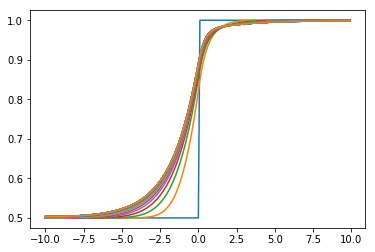

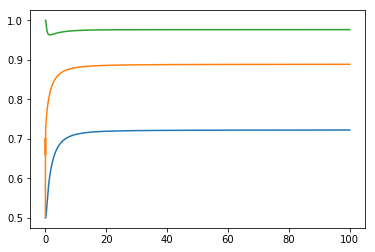

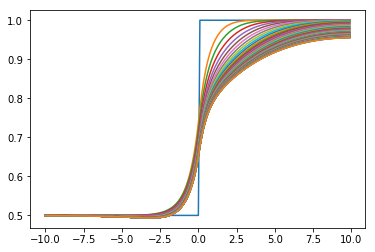

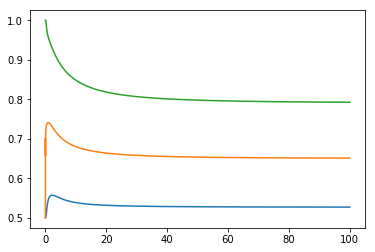

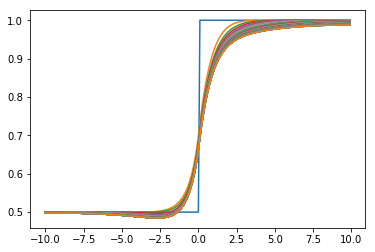

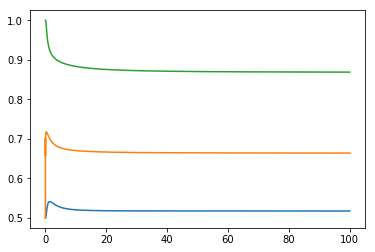

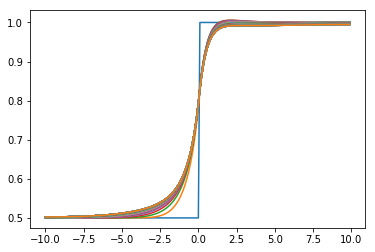

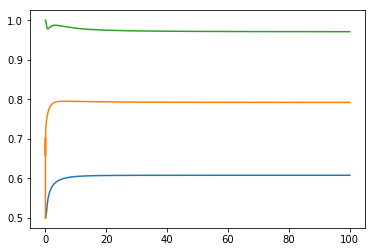

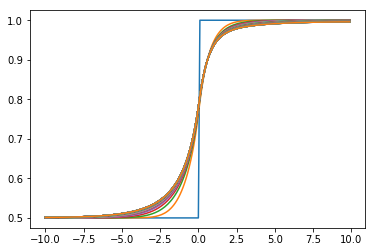

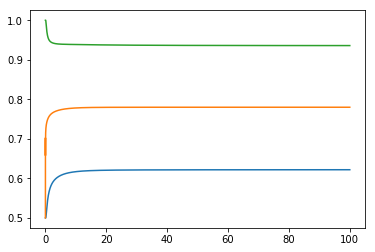

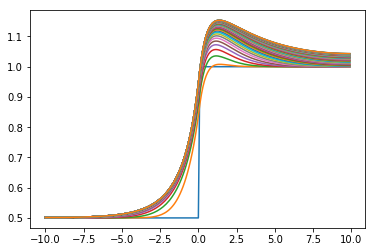

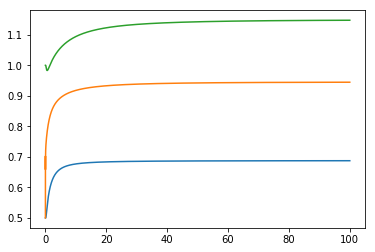

In [6]:
print(T)
space_inputs = range(K)
space_bounds = [-10 + n*dx for n in space_inputs]

for i in range(6):
    plt.figure(i+1)
    for j in range(0,T,200):
        plt.plot(space_bounds,U[j,space_inputs,i])
    plt.show()
    plt.figure()
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2)-10,i])
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2),i])
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2)+10,i])
    plt.show()

In [7]:
np.set_printoptions(suppress=True)
U[200-1,:,:].round(5)

array([[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       ..., 
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ]])

In [8]:
dt = .09**2
time = 100
dx = .1
space = 20 #(-10,10)
eps = .5
rho = dt/(dx**2)
A = np.array([[ 0.14 ,  0.021,  0.164, -0.012,  0.321,  0.639],
              [ 0.021,  0.18 , -0.137,  0.017, -0.256,  0.497],
              [ 0.164, -0.137,  1.649, -0.578, -0.268,  1.4  ],
              [-0.012,  0.017, -0.578,  0.404, -0.181, -0.277],
              [ 0.321, -0.256, -0.268, -0.181,  0.535,  0.071],
              [ 0.639,  0.497,  1.4  , -0.277,  0.071,  0.68 ]])
p = np.array([1,1,1,1,1,1])
r = A@ p


p1 = np.array([8.12365941,1.34022686,0.65574951,0,0,0])
p2 = np.array([0,0,0,2.31488624,0.49236209,5.31803791])



space_step = round(space/dx)
K = space_step
time_step = round(time/dt)
T = time_step

U = np.zeros((T,K+1,6))

for k in range(K + 1):
    if k >= K/2 + 1:
        U[0,k,:] = p1
    else:
        U[0,k,:] = p2


for i in range(T-1):
    for k in range(K - 1):
        k = k+1
        U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r-A@ U[i,k,:]))
    U[i+1,K,:] = U[i+1,K-1,:]
    U[i+1,0,:] = U[i+1,1,:]


This is the second example. 
There is only one community matrix, with two stable points on the boundary, with persisting sets (1,2,3) and (4,5,6). 
With diffusion added, we see that species 1,2,3 are tending to extinction.  Species 4,5,6 are initially tending to extinction but then start to take of the "space" (in x) where the other species where surving.

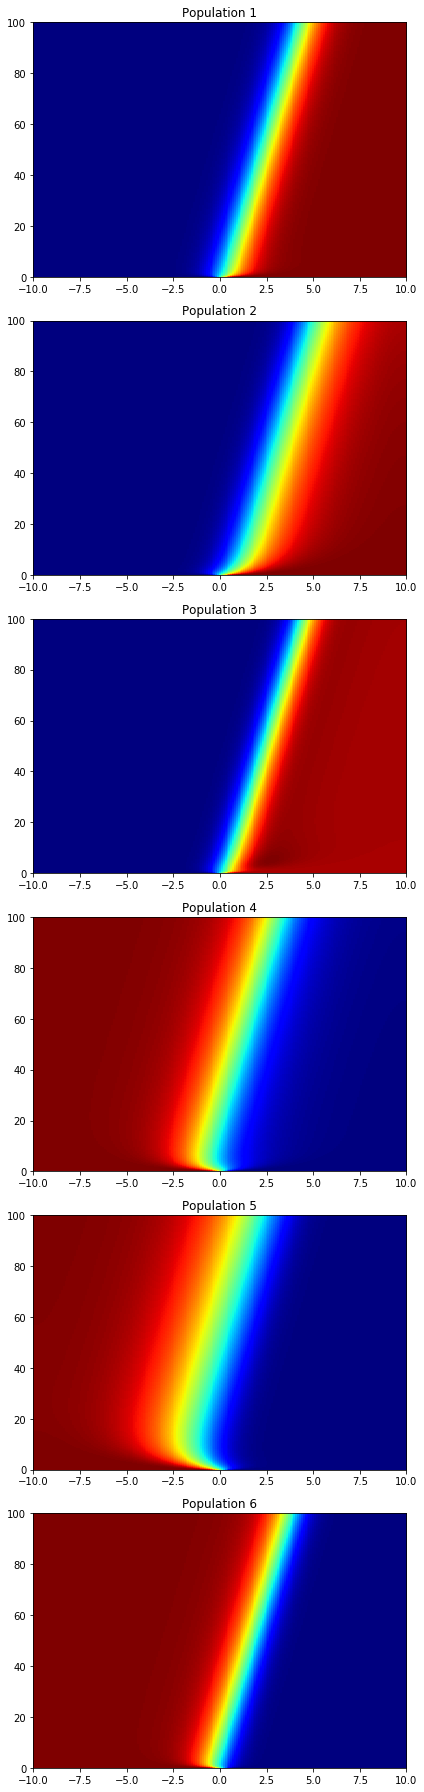

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(6,25))

ax1.imshow(U[:,:,0], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax1.set_title('Population 1')

ax2.imshow(U[:,:,1], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax2.set_title('Population 2')

ax3.imshow(U[:,:,2], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax3.set_title('Population 3')

ax4.imshow(U[:,:,3], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax4.set_title('Population 4')

ax5.imshow(U[:,:,4], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax5.set_title('Population 5')

ax6.imshow(U[:,:,5], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax6.set_title('Population 6')


plt.tight_layout()
plt.show()

12346


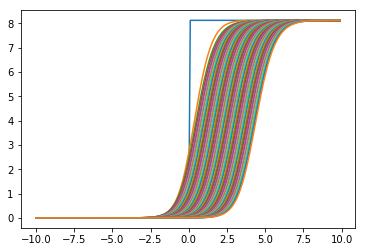

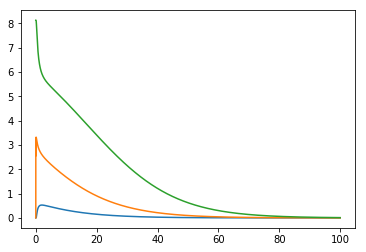

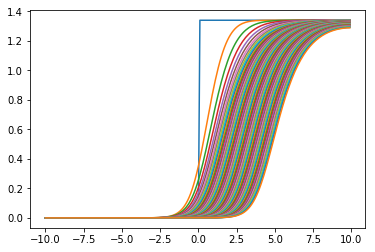

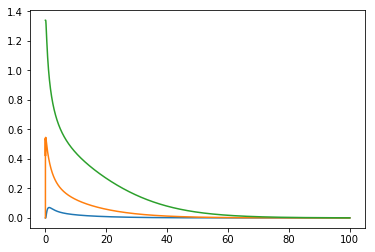

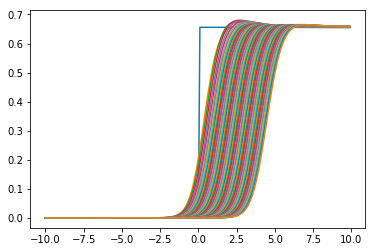

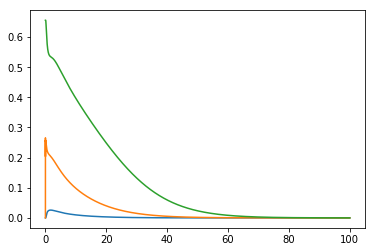

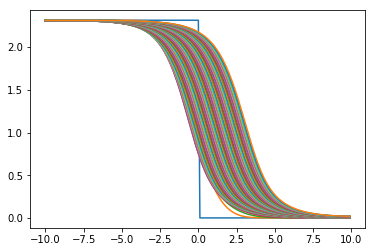

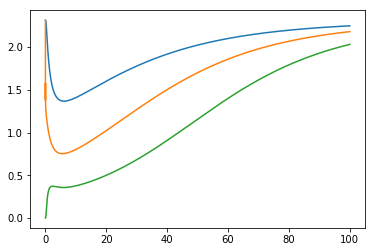

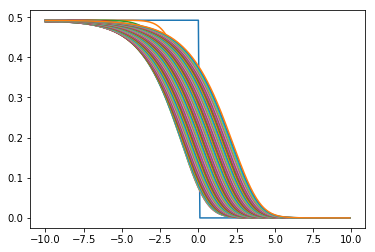

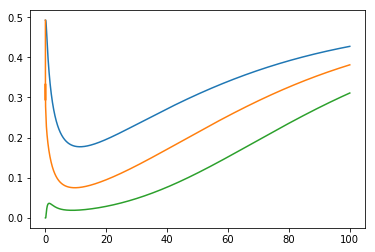

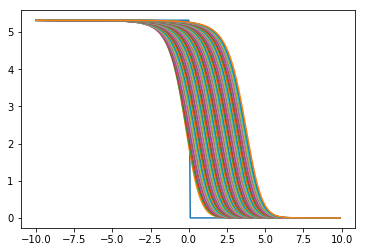

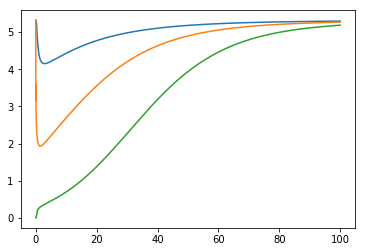

In [10]:
print(T)
space_inputs = range(K)
space_bounds = [-10 + n*dx for n in space_inputs]

for i in range(6):
    plt.figure(i+1)
    for j in range(0,T,200):
        plt.plot(space_bounds,U[j,space_inputs,i])
    plt.show()
    plt.figure()
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2)-10,i])
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2),i])
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2)+10,i])
    plt.show()

In [11]:
np.set_printoptions(suppress=True)
U[1000-1,:,0].round(5)

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.00001,  0.00001,  0.00001,  0.00001,  0.00001,  0.00002,
        0.00002,  0.00003,  0.00003,  0.00004,  0.00005,  0.00006,
        0.00007,  0.00009,  0.00011,  0.00014,  0.00017,  0.00021,
        0.00026,  0.00032,  0.00039,  0.00048,  0.00059,  0.00072,
        0.00089,  0.0011 ,  0.00135,  0.00166,  0.00204,  0.00251,
        0.00308,  0.00379,  0.00465,  0.00571,  0.00702,  0.00861,
        0.01057,  0.01297,  0.0159 ,  0.01949,  0.02387,  0.02922,
        0.03574,  0.04369,  0.05337,  0.06513,  0.0794 ,  0.09668,
        0.11758,  0.1428 ,  0.17315,  0.20957,  0.25314,  0.30

In [12]:
dt = .05**2
time = 50
dx = .1
space = 20 #(-10,10)
eps = .5
rho = dt/(dx**2)

A1 = np.array([[ 0.226,  0.359,  0.164,  0.995,  0.064,  0.175],
       [-0.821,  0.003, -0.718, -0.787,  0.051,  0.8  ],
       [-0.934, -0.375,  0.647,  0.074,  0.066,  0.295],
       [ 0.146,  0.632,  0.009,  0.554, -0.573,  0.601],
       [-0.189, -0.067,  0.652, -0.281,  0.94 , -0.435],
       [-0.425,  0.401,  0.787, -0.914, -0.562,  0.271]])

A2 = np.array([[ 0.802,  0.649, -0.49 ,  0.287, -0.692,  0.461],
       [-0.001,  0.996, -0.369,  0.555,  0.581,  0.16 ],
       [ 0.124,  0.944,  0.094,  0.779, -0.398,  0.501],
       [ 0.538,  0.923, -0.682,  0.447, -0.486, -0.503],
       [-0.848,  0.865, -0.108,  0.929,  0.912, -0.106],
       [ 0.723,  0.863, -0.225,  0.438,  0.183,  0.529]])

p = np.array([1,1,1,1,1,1])
p1 = np.array([0.31765198, 0, 0, 0, 4.94116134, 9.11415043])
p2 = np.array([5.62743687, 0, 3.43608654, 3.36464399, 4.01470345, 0])
r1 = A1@ p
r2 = A2@ p



space_step = round(space/dx)
K = space_step
time_step = round(time/dt)
T = time_step

U = np.zeros((T,K+1,6))

for k in range(K + 1):
    if k >= K/2 + 1:
        U[0,k,:] = p1
    else:
        U[0,k,:] = p2

for i in range(T-1):
    for k in range(K - 1):
        k = k+1
        if k >= K/2 + 1:
            U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r1-A1@ U[i,k,:]))
        else:
            U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r2-A2@ U[i,k,:]))
    U[i+1,K,:] = U[i+1,K-1,:]
    U[i+1,0,:] = U[i+1,1,:]



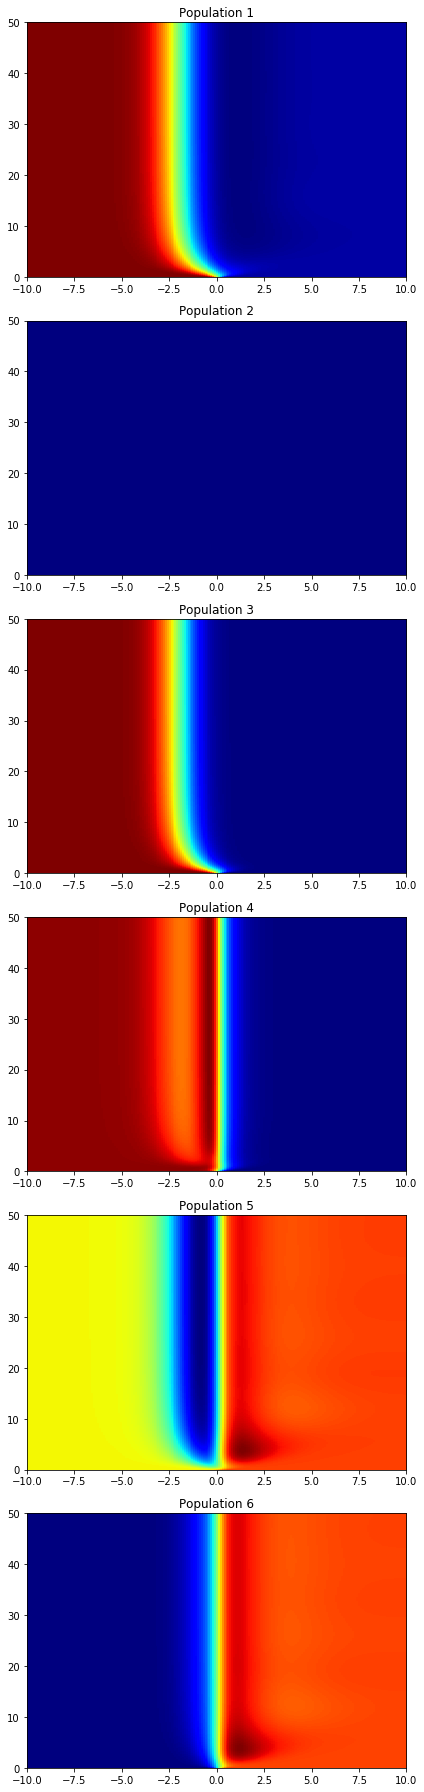

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(6,25))

ax1.imshow(U[:,:,0], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax1.set_title('Population 1')

ax2.imshow(U[:,:,1], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax2.set_title('Population 2')

ax3.imshow(U[:,:,2], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax3.set_title('Population 3')

ax4.imshow(U[:,:,3], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax4.set_title('Population 4')

ax5.imshow(U[:,:,4], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax5.set_title('Population 5')

ax6.imshow(U[:,:,5], extent=[-10,10,0,time], origin='lower', aspect='auto', cmap=plt.cm.jet)
ax6.set_title('Population 6')

plt.tight_layout()
plt.show()

20000


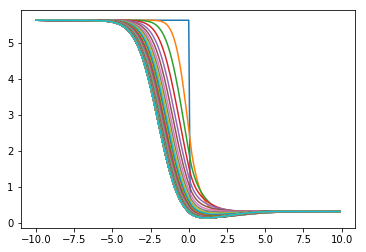

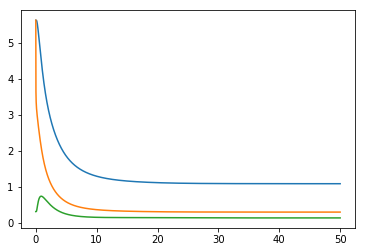

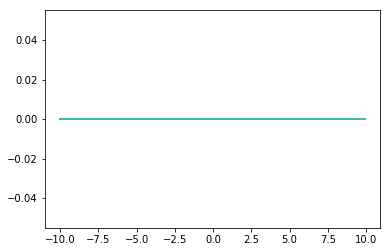

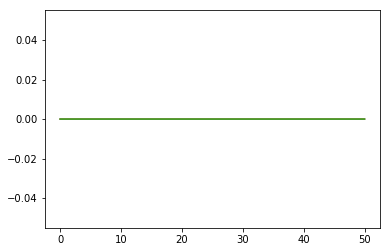

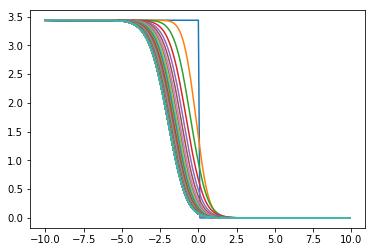

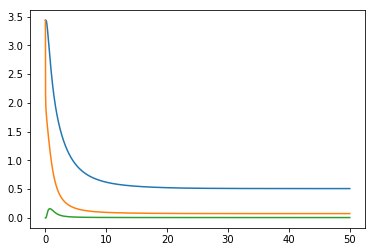

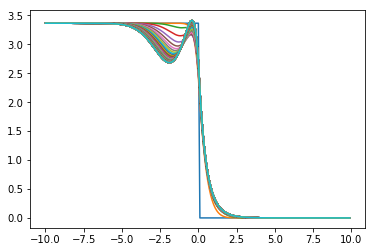

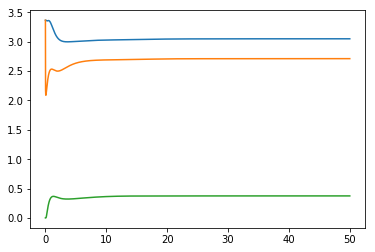

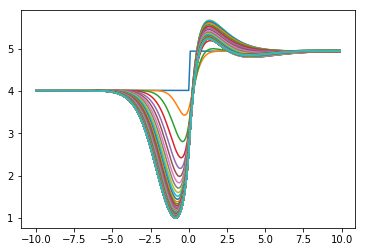

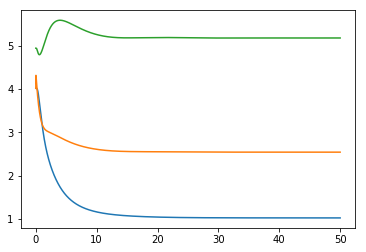

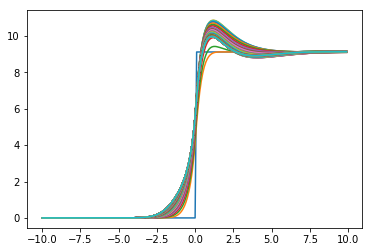

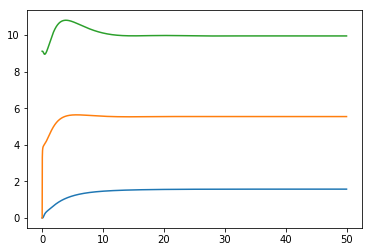

In [14]:
print(T)
space_inputs = range(K)
space_bounds = [-10 + n*dx for n in space_inputs]

for i in range(6):
    plt.figure(i+1)
    for j in range(0,T,200):
        plt.plot(space_bounds,U[j,space_inputs,i])
    plt.show()
    plt.figure()
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2)-10,i])
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2),i])
    plt.plot([k*dt for k in range(T)],U[range(T),int(K/2)+10,i])
    plt.show()

In [15]:
## Many normally distributed starting points and their dynamics
def MonteCarlo_LV(n_samples, A, p):
    n_spec = len(A)
    x_start = np.abs(np.random.randn(n_samples, n_spec))
    x_end = np.matrix(np.zeros((n_spec, n_samples)))
    for i in range(x_start.shape[0]):
        dyn_mat = LV_dynamics(A, p, x_start[i,:], .0001, .01, 10000)
        x_end[:,i] = dyn_mat[:,-1]
        plt.figure(i)
        for j in range(n_spec):
            plt.plot(dyn_mat[j,:].tolist()[0])
    plt.show()
    
    return x_end.T.round(2)

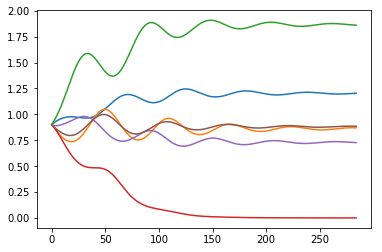

array([[ 0.459, -0.576,  0.476,  0.62 , -0.3  ,  0.389],
       [ 0.282,  0.425, -0.372,  0.043, -0.924, -0.987],
       [-0.08 ,  0.685,  0.925,  0.86 , -0.744,  0.271],
       [ 0.826, -0.31 ,  0.002,  0.167, -0.965, -0.835],
       [-0.417,  0.97 , -0.597, -0.932,  0.921, -0.445],
       [ 0.038, -0.564, -0.941, -0.905,  0.27 ,  0.865]])

In [16]:
## Random symmetric matrix A

N = 6
A = 2*np.random.rand(N,N) - 1.
#A = A + A.T
A = A.round(3)
A[np.diag_indices(N)] = np.abs(A.diagonal())


I = np.matrix([[1,0,0,0,0,0],
               [0,1,0,0,0,0],
               [0,0,1,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,0,1,0],
               [0,0,0,0,0,1]])
p = np.matrix([1,1,1,1,1,1]).T

#MonteCarlo_LV(2,A,p)

dyn_mat = LV_dynamics(A, p, [.9,.9,.9,.9,.9,.9], .001, .1, 100)
plt.figure()
for j in range(6):
    plt.plot(dyn_mat[j,:].tolist()[0])
#plt.savefig('Noncompetitive2', bbox_inches='tight')
plt.show()

A

In [17]:

N = 6
A = 2.*np.random.rand(N,N) - 1.
# A = A + A.T
A = A.round(3)
A[np.diag_indices(N)] = np.abs(A.diagonal())

# A = np.array([[ 0.14 ,  0.021,  0.164, -0.012,  0.321,  0.639],
#               [ 0.021,  0.18 , -0.137,  0.017, -0.256,  0.497],
#               [ 0.164, -0.137,  1.649, -0.578, -0.268,  1.4  ],
#               [-0.012,  0.017, -0.578,  0.404, -0.181, -0.277],
#               [ 0.321, -0.256, -0.268, -0.181,  0.535,  0.071],
#               [ 0.639,  0.497,  1.4  , -0.277,  0.071,  0.68 ]])

# A = np.array([[ 0.896,  0.251, -0.103,  0.563, -0.046,  0.325],
#        [ 0.251,  0.848, -0.206,  0.196,  0.06 ,  0.828],
#        [-0.103, -0.206,  0.939,  0.105, -0.008,  0.051],
#        [ 0.563,  0.196,  0.105,  0.962,  0.375,  0.401],
#        [-0.046,  0.06 , -0.008,  0.375,  0.906,  0.186],
#        [ 0.325,  0.828,  0.051,  0.401,  0.186,  0.976]])

# A = np.array([[ 0.845,  0.123,  0.085, -0.145, -0.362, -0.445],
#        [ 0.123,  0.954,  0.242,  0.16 ,  0.237, -0.15 ],
#        [ 0.085,  0.242,  0.942,  0.551, -0.029, -0.027],
#        [-0.145,  0.16 ,  0.551,  0.813,  0.02 ,  0.08 ],
#        [-0.362,  0.237, -0.029,  0.02 ,  0.986,  0.105],
#        [-0.445, -0.15 , -0.027,  0.08 ,  0.105,  0.972]])

I = np.matrix([[1,0,0,0,0,0],
               [0,1,0,0,0,0],
               [0,0,1,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,0,1,0],
               [0,0,0,0,0,1]])
p = np.matrix([1,1,1,1,1,1]).T



r = A*p
T = [0,1,2,3,4,5]

def powerset(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]
        
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

            
power_T = list(powerset(T))
power_T.pop(0)
solutions = []
pos_det = []
P_matrix = []
murty_det = []
for S in power_T:
    #S = [0,1,3]
    Q = I[np.ix_(S,T)]
    P = Q.T*Q
    #A4 = A[np.ix_(S4,S4)]
    #Av4 = A[np.ix_(S,[3])]
    AS = P*A*P
    BS = Q*A*Q.T
    pS = lin.pinv(AS)*r
    if sum(sum(((A*(p-pS)).T).round(3) <= 0)) == N & sum(sum((pS.T).round(3) >= 0)) == N:
        isStable = np.matrix(np.diag(np.array(pS.T)[0]))*AS
        if sum(lin.eig(isStable)[0].real >= 0) == N:
            solutions = solutions + [S]
            print('pS = ',(pS.T))
            print('A*(p-pS) = ',((A*(p-pS)).T).round(3))
            print('AS e-values = ',(lin.eig(AS)[0].real).round(3))
            print('DS*AS e-values = ',lin.eig(isStable)[0].real.round(3))
            print(lin.det(Q*A*Q.T))
            print( )
    if lin.det(Q*A*Q.T) > 0:
        pos_det = pos_det + [S]
    
    if lin.det(Q*A*Q.T) > 0:
        if sum(sum(((Q*pS).T).round(6) >= 0)) == len(S):
            murty_det = murty_det + [S]



for R in pos_det: 
    if len(R) == 1:
        P_matrix = P_matrix + [R]
    sub_set = [np.array(i).tolist() for i in findsubsets(R,len(R)-1)]
    broke = False
    for mylist in sub_set:
        if mylist not in P_matrix:
            broke = True
            break; 
    if broke == False: 
        P_matrix = P_matrix + [R]

print(solutions)
#print(P_matrix)
#print(murty_det)
#lin.eig(A)[0].real.round(3)

[]


In [18]:
A2 = np.array([[ 0.802,  0.649, -0.49 ,  0.287, -0.692,  0.461],
       [-0.001,  0.996, -0.369,  0.555,  0.581,  0.16 ],
       [ 0.124,  0.944,  0.094,  0.779, -0.398,  0.501],
       [ 0.538,  0.923, -0.682,  0.447, -0.486, -0.503],
       [-0.848,  0.865, -0.108,  0.929,  0.912, -0.106],
       [ 0.723,  0.863, -0.225,  0.438,  0.183,  0.529]])
p2 = np.array([5.62743687, 0, 3.43608654, 3.36464399, 4.01470345, 0])